# Import and Check Data

In [32]:
import pandas as pd
import numpy as np

In [33]:
fake = pd.read_csv('WELFake_Dataset.csv')
fake.head()

,Unnamed: 0.1,Unnamed: 0,title,text,label
0,0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,1,NaN,Did they post their votes for Hillary already?,1
2,2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


# Preprocessing (Cleaning)

In [35]:
missing_data = fake.isnull().sum()
print("Number of missing values in each column:")
print(missing_data)

Number of missing values in each column:
Unnamed: 0.1     0
Unnamed: 0       0
title           32
text             3
label            0
dtype: int64


In [36]:
fake=fake.dropna()

In [37]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4965 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.1  4965 non-null   int64 
 1   Unnamed: 0    4965 non-null   int64 
 2   title         4965 non-null   object
 3   text          4965 non-null   object
 4   label         4965 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 232.7+ KB


# Vectoring Text Data

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a series to store the labels: y and x for features
y = fake["label"]
x=  fake['title'] + ' ' + fake['text']
x.head()

0    LAW ENFORCEMENT ON HIGH ALERT Following Threat...
2    UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
3    Bobby Jindal, raised Hindu, uses story of Chri...
4    SATAN 2: Russia unvelis an image of its terrif...
5    About Time! Christian Group Sues Amazon and SP...
dtype: object

# Show WordCloud Image

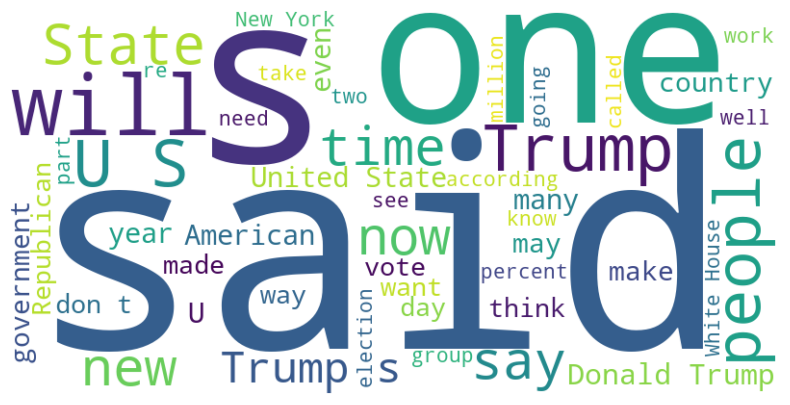

In [41]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Concatenate the text from both columns into a single string
combined_text = ' '.join(fake['title'] + ' ' + fake['text'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, max_words=50, background_color='white').generate(combined_text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

@ Split and Transform the Data

In [43]:
# Split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=53)

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words=["said", "one", "us", "people"], max_df=0.85)

# Transform the training data: tfidf_train
tfidf_train = tfidf_vectorizer.fit_transform(X_train.values)

# Transform the test data: tfidf_test
tfidf_test = tfidf_vectorizer.transform(X_test.values)

Naive Bayes Model

In [45]:
# Import the necessary modules
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Instantiate a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(tfidf_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print("Accuracy Score:", score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels=[0,1])
print("Confusion Matrix:")
print(cm)

Accuracy Score: 0.8364856619890177
Confusion Matrix:
[[619 188]
 [ 80 752]]
